In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd 
import os 
import sys
from collections import Counter
from scipy import stats

import config
from database_action import db

connect to /home/xander/affinityDB/test_t/affinity.db


In [2]:
def multi_bar(xs,ys,title,xlabel,ylabel,filename,save=False,width=0.8,legend=None, alpha=0.5, cm = plt.get_cmap('Vega20'), cm_indice=None):
    """
    draw multiple bar in one plot
    """
    fig, ax = plt.subplots()
    for i in range(len(xs)):
        if legend:
            ax.bar(xs[i],ys[i],width=width, alpha=alpha, label = legend[i],color=cm([cm_indice[i]]))
        else:
            ax.bar(xs[i],ys[i],width=width, alpha=alpha,color=cm([cm_indice[i]]))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if not legend==None:
        
        ax.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
    if save:
        fig.savefig(filename, bbox_inches='tight')
        print filename, " saved."

In [3]:
def multi_plot(xs,ys,title,xlabel,ylabel,filename,save=False,width=0.8,legend=None, alpha=0.5, cm = plt.get_cmap('Vega20'), cm_indice=None):
    """
    draw multiple curve in one plot
    """
    print len(xs)
    
    fig, ax = plt.subplots()
    for i in range(len(xs)):
        order  = np.flipud(np.argsort(xs[i]))
        x = xs[i][order]
        y = ys[i][order]
        if legend:
            ax.plot(x,y, label = legend[i],color=cm(cm_indice[i]))
        else:
             ax.plot(x,y,color=cm(cm_indice[i]))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if not legend is None:
        # move legend out of the plot
        ax.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
        
    if save:
        # save image
        fig.savefig(filename, bbox_inches='tight')
        print filename, " saved."

In [4]:
def multi_errbar(xs,ys, yerrs,title,xlabel,ylabel,filename,save=False,width=0.8,legend=None, alpha=0.5, cm = plt.get_cmap('Vega20'), cm_indice=None):
    """
    draw multiple bar in one plot
    """
    fig, ax = plt.subplots()
    for i in range(len(xs)):
        if legend:
            ax.errorbar(xs[i],ys[i],yerr=yerrs[i], alpha=alpha, label = legend[i])
        else:
            ax.errorbar(xs[i],ys[i],yerr=yerrs[i], alpha=alpha)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if not legend==None:
        
        ax.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
    if save:
        fig.savefig(filename, bbox_inches='tight')
        print filename, " saved."

In [5]:
def split_ligand(sns=None):
    if sns is None:
        sns = db.get_idx_by_type('split_ligand')
    elif type(sns).__name__ in ['int','str','unicode']:
        sns = [sns]
        
        
    xs = []
    ys = []
    legend = []
    cm_indice = []
    
    for idx,sn in enumerate(sns):
        table_name, table_param, df = db.get_success_data(sn, dataframe=True)
        val = df['heavy_atom']
        val_c = Counter(val)
        fc = np.asarray(val_c.items())
        
        xs.append(fc[:,0])
        ys.append(fc[:,1])
        legend.append(table_name)
        cm_indice.append(idx*2)
        
    multi_bar(xs,
              ys,
              title="ligands havey atom",
              xlabel="heavy atom num",
              ylabel="count",
              filename='None',
              width=0.4,
              legend=legend,
              save=False,
              cm_indice=cm_indice)
                  



In [6]:
def split_receptor(sns=None):
    if sns is None:
        sns = db.get_idx_by_type('split_receptor')
    elif type(sns).__name__ in ['int', 'str','unicode']:
        sns = [sns]
        
    xs = []
    ys = []
    legend = []
    cm_indice = []
    
    for idx, sn in enumerate(sns):
        table_name, table_param, df = db.get_success_data(sn, dataframe=True)
        if 'experiment' in df.columns:
            df = df[df['experiment']=='X-RAY DIFFRACTION']
            res = df[['receptor','resolution']]
            res = res.drop_duplicates()
            val_c = Counter((100*res['resolution']).apply(int)/100)
            fc = np.asarray(val_c.items())
            xs.append(fc[:,0])
            ys.append(fc[:,1])
            legend.append(table_name)
            cm_indice.append(idx*2)
            
    multi_bar(xs,
              ys,
              title="resolution",
              xlabel="resolution",
              ylabel="count",
              filename="None",
              width=0.01,
              legend=legend,
              save=False,
              cm_indice=cm_indice)
            
            


In [7]:
def rmsd(sns=None):
    if sns is None:
        sns = db.get_idx_by_type('rmsd')
    elif type(sns).__name__ in ['int', 'str','unicode']:
        sns = [sns]
        
    xs = []
    ys = []
    legend = []
    cm_indice = []
    
    xsc = []
    ysc =[]
    
    
    for idx, sn in enumerate(sns):
        table_name, table_param, df = db.get_success_data(sn, dataframe=True)
        
        res = df[['position','rmsd']]
        x = []
        y = []
        
        val_c = Counter(res['rmsd'].apply(int))
        fc = np.asarray(val_c.items())
        xsc.append(fc[:,0])
        ysc.append(fc[:,1])
        
        for name, group in res.groupby('position'):

            x.append(int(name))
            y.append(np.mean(group['rmsd']))
            
        
        xs.append(np.asarray(x))
        ys.append(np.asarray(y))
        legend.append(table_name)
        cm_indice.append(idx*2)
    

    multi_plot(xs,
              ys,
              title="rmsd",
              xlabel="position",
              ylabel="mean",
              filename='None',
              width=0.1,
              legend=legend,
              save=False,
              cm_indice=cm_indice)
    
    multi_bar(xsc,
               ysc,
               title="rmsd",
               xlabel="rmsd",
               ylabel="count",
               filename="None",
               width=1,
               legend=legend,
               save=False,
               cm_indice=cm_indice)
    
                  



In [8]:
def overlap(sns=None):
    if sns is None:
        sns = db.get_idx_by_type('overlap')
    elif type(sns).__name__ in ['int', 'str','unicode']:
        sns = [sns]
        
    xs = []
    ys = []
    legend = []
    cm_indice = []
    
    xsc = []
    ysc =[]
    
    for idx, sn in enumerate(sns):
        table_name, table_param, df = db.get_success_data(sn, dataframe=True)
        #print df.columns
    for idx, sn in enumerate(sns):
        table_name, table_param, df = db.get_success_data(sn, dataframe=True)
        
        res = df[['position','overlap_ratio']]
        x = []
        y = []
        val_c = Counter((100*res['overlap_ratio']).apply(int)/100.)
        fc = np.asarray(val_c.items())
        xsc.append(fc[:,0])
        ysc.append(fc[:,1])
        
        for name, group in res.groupby('position'):
            x.append(int(name))
            y.append(np.mean(group['overlap_ratio']))
            
        
        xs.append(np.asarray(x))
        ys.append(np.asarray(y))
        legend.append(table_name)
        cm_indice.append(idx*2)
    
    multi_plot(xs,
              ys,
              title="overlap",
              xlabel="position",
              ylabel="mean",
              filename='None',
              width=0.01,
              legend=legend,
              save=False,
              cm_indice=cm_indice)
    
    multi_bar(xsc,
               ysc,
               title="overlap",
               xlabel="overlap",
               ylabel="count",
               filename="None",
               width=0.05,
               legend=legend,
               save=False,
               cm_indice=cm_indice)
    



In [9]:
def native_contact(sns=None):
    if sns is None:
        sns = db.get_idx_by_type('native_contact')
    elif type(sns).__name__ in ['int', 'str','unicode']:
        sns = [sns]
        
    xs = []
    ys = []
    legend = []
    cm_indice = []
    
    xsc = []
    ysc =[]
    
    for idx, sn in enumerate(sns):
        table_name, table_param, df = db.get_success_data(sn, dataframe=True)
        #print df.columns
    for idx, sn in enumerate(sns):
        table_name, table_param, df = db.get_success_data(sn, dataframe=True)
        
        res = df[['position','native_contact']]
        x = []
        y = []
        pos = res[res['native_contact']>0]
        val_c = Counter((100*pos['native_contact']).apply(int)/100.)
        fc = np.asarray(val_c.items())
        xsc.append(fc[:,0])
        ysc.append(fc[:,1])
        
        for name, group in res.groupby('position'):
            x.append(int(name))
            y.append(np.mean(group['native_contact']))
            
        
        xs.append(np.asarray(x))
        ys.append(np.asarray(y))
        legend.append(table_name)
        cm_indice.append(idx*2)
    
    multi_plot(xs,
              ys,
              title="native contact",
              xlabel="position",
              ylabel="mean",
              filename='None',
              width=0.1,
              legend=legend,
              save=False,
              cm_indice=cm_indice)
    
    multi_bar(xsc,
               ysc,
               title="native contact",
               xlabel="native contact",
               ylabel="count",
               filename="None",
               width=0.01,
               legend=legend,
               save=False,
               cm_indice=cm_indice)
    

1
1
1


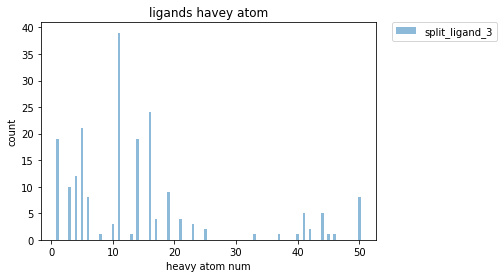

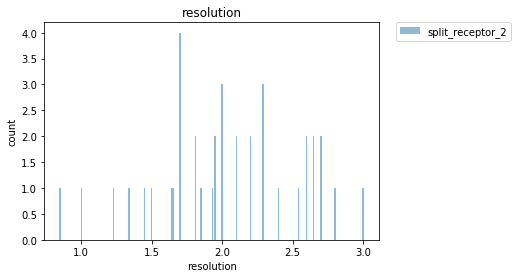

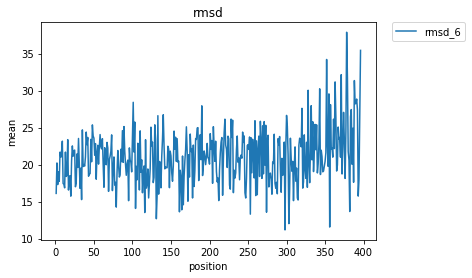

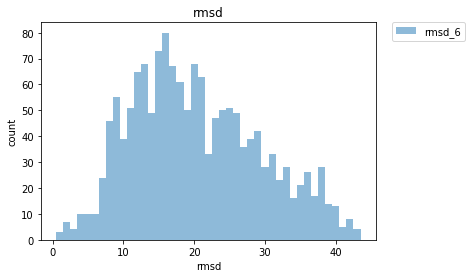

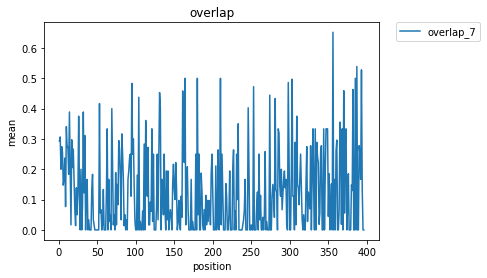

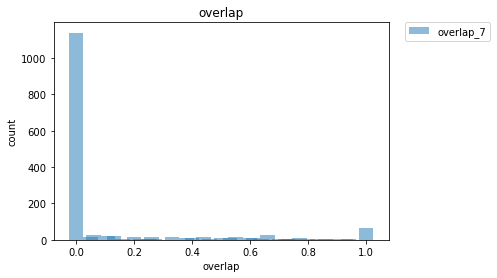

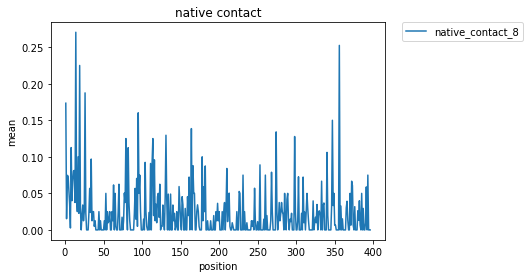

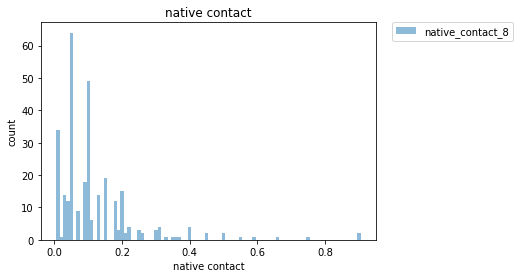

In [10]:
split_ligand()
split_receptor()
rmsd()
overlap()
native_contact()

In [7]:
sns

[3]